# **Task 2**

## **DJS Synapse Learning Period**
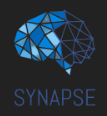

Import the required libraries here. It is always better to keep your imports in one place as it makes your code look neater and allows other users to identify what all you have used.

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset that we are going to use for this task has already been provided to you. Download and saved the file in a folder called synapse_w2 in the root of your drive.

Mount your drive and load the dataset the same way you had loaded in the previous task.

In [277]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [278]:
df=pd.read_csv("/content/gdrive/MyDrive/synapse_w2/housing_data.csv")

In [279]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## **1) Linear Regression on Housing Price**

### **EDA: Exploraatory Data Analysis**
**'info()' method to check the data types and number**


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set**

Hint: describe()

In [281]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [282]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization
**The target quantity is price. Let us see its distribution.**

Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

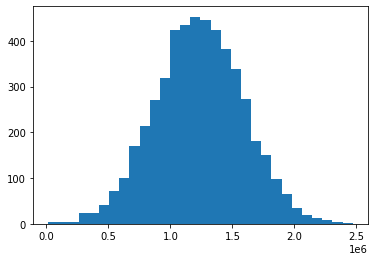

In [283]:
plt.hist(df["Price"],bins=30)
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**

Hint: corr()

Google out the meaning of the values you achieve by using this function.

In [284]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets
Make a list of data frame column names Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"

Then create a new dataframe containing the target (Price) and store it in a variable called "y"

In [285]:
lst=list(df.columns)
X=df.drop(["Address","Price"],axis="columns")
y=df["Price"]

In [286]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape, y.shape)

(5000, 5) (5000,)


In [287]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [288]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### **Test-train split**
Import train_test_split function from scikit-learn

In [289]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [290]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)

In [291]:
print("Size and shape of X_train respectively are",X_train.size,"and",X_train.shape)
print("Size and shape of X_test respectively are",X_test.size,"and",X_test.shape)
print("Size and shape of y_train respectively are",y_train.size,"and",y_train.shape)
print("Size and shape of y_test respectively are",y_test.size,"and",y_test.shape)

Size and shape of X_train respectively are 17500 and (3500, 5)
Size and shape of X_test respectively are 7500 and (1500, 5)
Size and shape of y_train respectively are 3500 and (3500,)
Size and shape of y_test respectively are 1500 and (1500,)


### **Model fit and training**
Import LinearRegression and metrics from scikit-learn

In [292]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
lm=LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**

Hint: lm.fit()

In [293]:
lm.fit(X_train,y_train)

LinearRegression()

### **Prediction, error estimate, and regression evaluation matrices**
Prediction using the lm model

Use lm.predict() on X_test and store them in a variable called "predictions".
Print type and size of the predictions.

Size should be (1500,) if everything is correct.

In [294]:
predictions=lm.predict(X_test)
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(1500,)


Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line

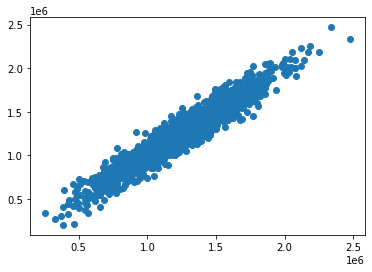

In [295]:
plt.scatter(predictions,y_test)
plt.show()

### **Model Evaluation**
Since we are using a regression model here, we cannot use the same metrics we had used during our workshop. The metrics we used then were classification metrics. You can explore different regresion metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [296]:
print("R2 value=",round(metrics.r2_score(y_test,predictions),3))

R2 value= 0.915


In [297]:
print("MAE=",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE=",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE=",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

MAE= 81135.566
MSE= 10068422551.401
RMSE= 100341.53


# 2) K-nearest neighbor Classification

### Import dataset

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [298]:
df=pd.read_csv("/content/gdrive/MyDrive/synapse_w2/classified_data.txt",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [300]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [301]:
lst=list(df.columns)
lst

['WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

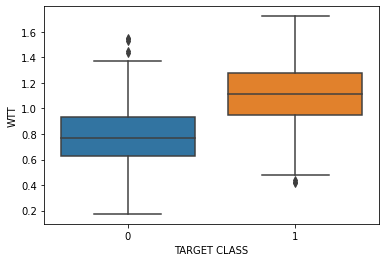

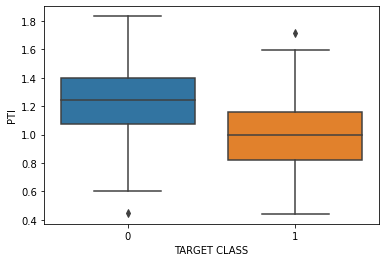

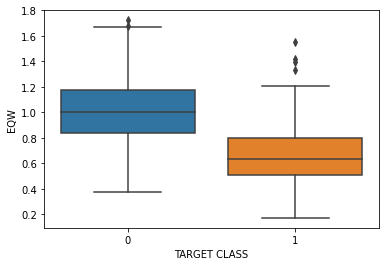

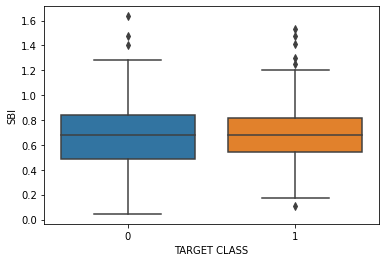

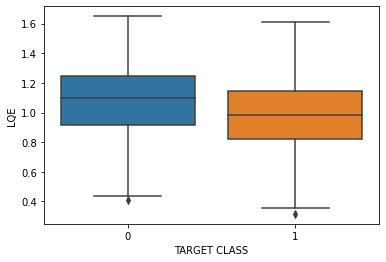

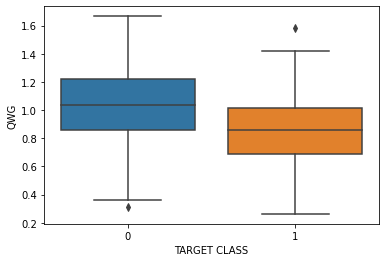

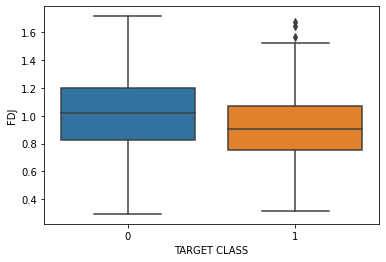

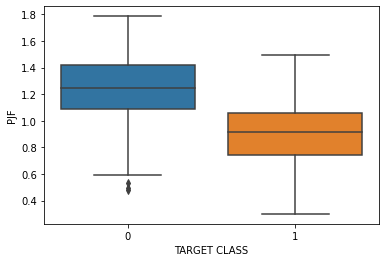

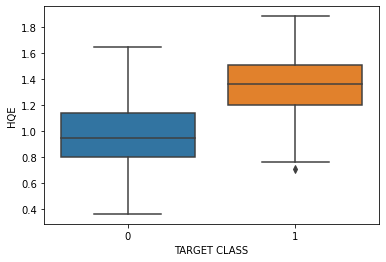

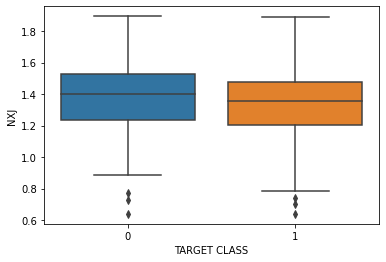

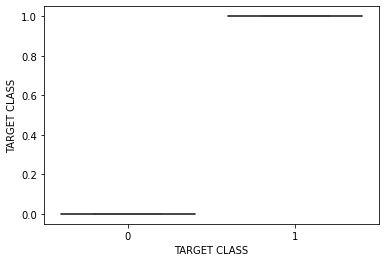

<Figure size 432x288 with 0 Axes>

In [302]:
for i in range(len(lst)):
  sns.boxplot(data=df,x="TARGET CLASS",y=lst[i])
  plt.figure()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [303]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [304]:
scaler.fit(df.drop("TARGET CLASS",axis="columns"))
arr=scaler.transform(df.drop("TARGET CLASS",axis="columns"))
arr

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [305]:
df_feat=pd.DataFrame(arr,columns=lst[0:len(lst)-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [306]:
X=df_feat
y=df["TARGET CLASS"]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [307]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [308]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [309]:
pred=knn.predict(X_test)
pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [310]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [311]:
print(np.round(accuracy_score(y_test,pred),3))

0.937


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [322]:
acc_test=[]
acc_train=[]
diff=[]
K_value=[]
for i in range(1,61):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_test=knn.predict(X_test)
  pred_train=knn.predict(X_train)
  acc_train.append(np.round(accuracy_score(y_train,pred_train),3))
  acc_test.append(np.round(accuracy_score(y_test,pred_test),3))
  diff.append(np.round(accuracy_score(y_train,pred_train),3)-(np.round(accuracy_score(y_test,pred_test),3)))
  K_value.append(i)

**Plot a graph of K value vs Accuracy**

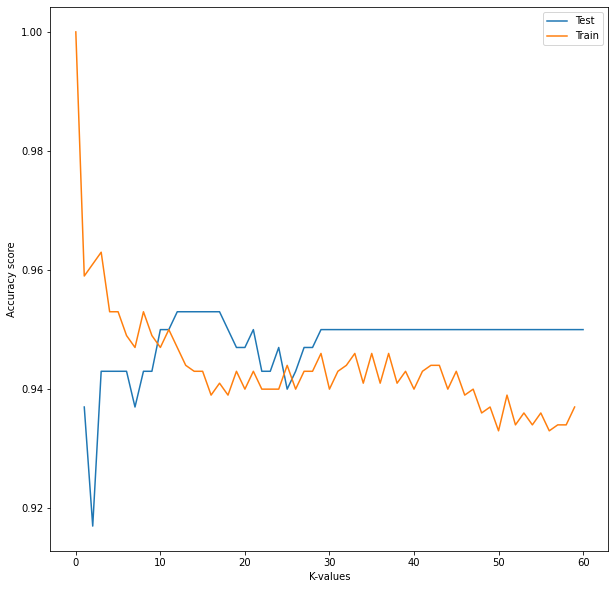

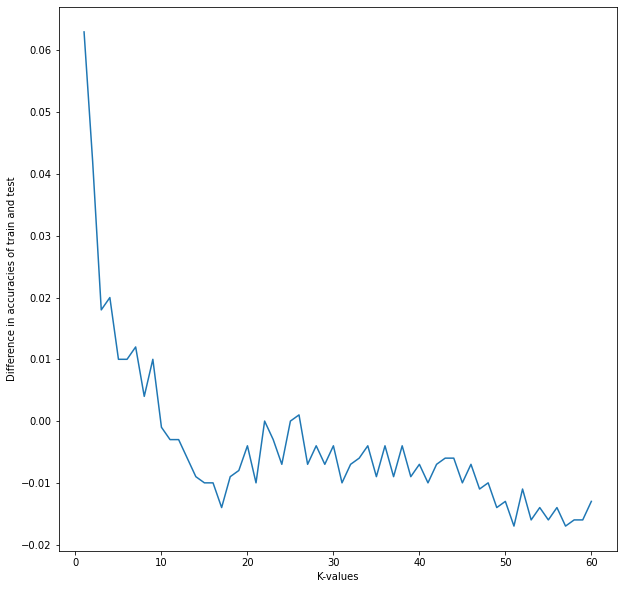

In [326]:
plt.figure(figsize=(10,10))
plt.plot(K_value,acc_test,acc_train)
plt.legend(["Test","Train"])
plt.xlabel("K-values")
plt.ylabel("Accuracy score")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(K_value,diff)
plt.xlabel("K-values")
plt.ylabel("Difference in accuracies of train and test")
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [334]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(np.round(accuracy_score(y_test,pred),3))

0.95


In [315]:
# Reasons:

The best value of 'k' is approximately 11 as the accuracy score of 
test dataset at k=11 is among the highest in the entire graph, and also because the difference between the accuracy scores of the training and testing datasets is among the least.

The highest accuracy score by test set is achieved at approximately 15,
but the difference in accuracies here turns out to be more significant than at k=11.

There also other point where the difference turns out to be 0, but these points don't have sufficiently high enough accuracy score as compared to k=11 for the test set.

# **Bonus: To be done only if you have completed the above tasks.**

# **Support Vector Machines**

Support Vector Machine (SVM) is a robust ML algorithm, used in Supervised ML for both Classification and Regression. 

So what a SVM basically does is it creates a sort of a boundary line (or plane in higher dimensions) between the different classes of data points in a dataset. This boundary line is called **hyperplane**. Along with this hyperplane, it also creates two marginal planes that pass through the nearest neighbour(s) of hyperplane. The data points through which the marginal planes pass through are called **support vectors**. The distance between the marginal palnes is called margin. This can be seen below:

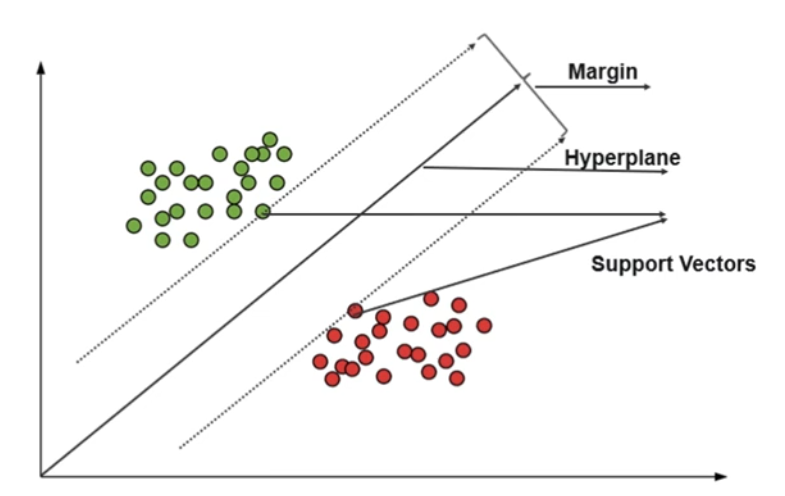

Clearly, multiple planes can be drawn through the data points. However, the plane with largest marginal distance is considered as the hyperplane as it provides the clearest distinction between the classified classes. Eg:

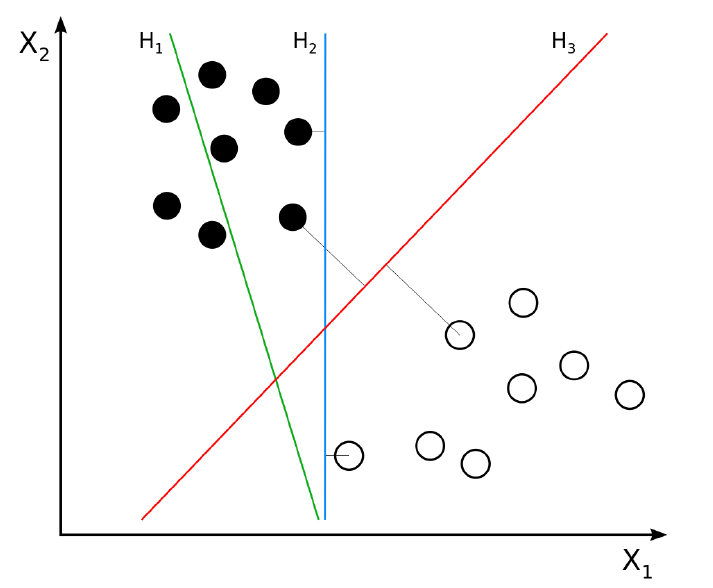

Here, H3 is the most optimum hyperplane as it has the greatest marginal distance.

The types of margins are:


*   Soft Margin - Since most data out in the world isn't linearly seperable, we allow some data points to "leak" through the marginal lines in the direction of the main hyperplane. They stay on the wrong side of the marginal planes, sometimes even on the other side of the other marginal plane along with the other class.These are called soft margins. Eg:

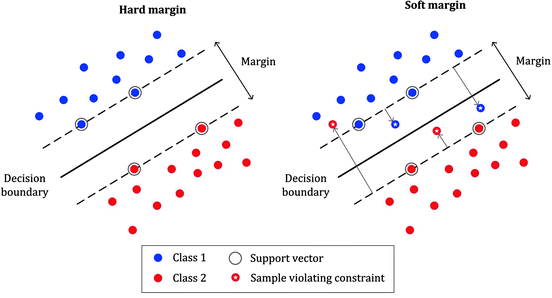

*   Hard Margin - Hrad margins exist in linearly seperable data that possess a hyperplane with accompanying parallel marginal planes that have no leaks of the type described above. They clearly distinguish the different classes. It can be seen in above image along soft margin.



If the data is not linearly seperable even by soft margins, SVM uses a mechanism called the SVM kernel to convert the originally low dimensions of the data points to a higher dimension, where we can now draw a hyperplane to classify the data points appropriately. Eg:

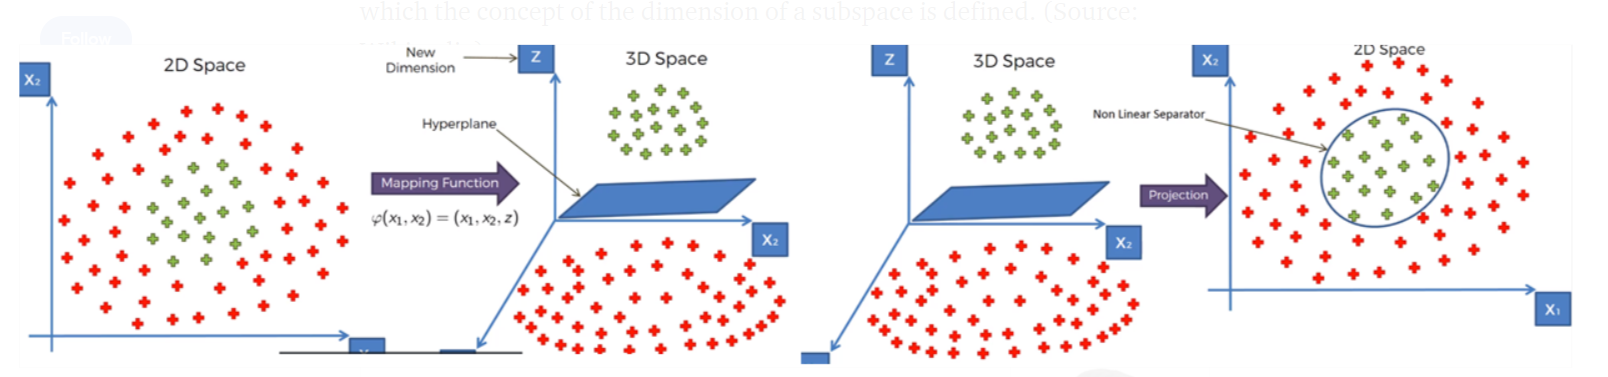

From this basic understanding, it can be gleaned that SVM is a powerful algorithm capable of differentiating classes of data, especially in situations where number of dimensions of data points is more than the number of specimens. It has applications in handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages. 



# **End of Task**

> ©DJS Synapse 2022 - 2023

